In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option("display.max_columns", 200)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

In [3]:
df


,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


In [4]:
df_row_val = df.shape[0]
print(df_row_val)
df.isna().sum()

11986


set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

In [5]:
df['theme_name'].value_counts()

Supplemental             497
Technic                  439
City                     296
Friends                  285
Duplo                    260
                        ... 
The LEGO Batman Movie      1
Planet Series 3            1
Ghostbusters               1
Marvel Super Heroes        1
Indiana Jones              1
Name: theme_name, Length: 390, dtype: int64

In [6]:
merged = df.merge(parent_theme, left_on='parent_theme', right_on='name')
merged.drop(columns='name_y', inplace=True)
is_licensed = merged.loc[merged['is_licensed']]

In [7]:
is_licensed

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [8]:

starwars = is_licensed.loc[is_licensed['parent_theme'].str.contains('Star Wars')]
is_licensed.isna().sum()
is_licensed = is_licensed.dropna(subset='set_num')
is_licensed

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [9]:
starwars

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
4097,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
4098,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,True
4099,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
4100,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,True


In [10]:
starwars.isna().sum()

set_num           0
name_x            0
year              0
num_parts       275
theme_name        0
parent_theme      0
id                0
is_licensed       0
dtype: int64

In [11]:
starwars_val = starwars.shape[0]
the_force = (starwars_val/ 1179) * 100

In [12]:
print(the_force)

51.653944020356235


In [13]:
is_licensed

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [14]:
edit_licensed = is_licensed.dropna(subset='num_parts')
edit_licensed['count'] = 1
edit_licensed

C:\Users\user\AppData\Local\Temp\ipykernel_6676\559120371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edit_licensed['count'] = 1


,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed,count
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True,1
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
3498,10129-1,Rebel Snowspeeder - UCS,2003,1456.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
3502,10144-1,Sandcrawler,2005,1679.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
...,...,...,...,...,...,...,...,...,...
11962,75828-1,Ecto1 & 2,2016,552.0,Ghostbusters,Ghostbusters,607,True,1
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True,1
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True,1
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True,1


In [20]:

lego =edit_licensed.groupby(['year', 'parent_theme']).sum().reset_index().sort_values('count', ascending=False).drop_duplicates(['year'])
lego

,year,parent_theme,num_parts,id,is_licensed,count
76,2017,Super Heroes,13123.0,22172,46,46
63,2015,Star Wars,11410.0,5372,34,34
70,2016,Star Wars,6934.0,4266,27,27
43,2012,Star Wars,6769.0,3792,24,24
55,2014,Star Wars,8293.0,3634,23,23
33,2010,Star Wars,6003.0,3318,21,21
48,2013,Star Wars,6159.0,3002,19,19
15,2005,Star Wars,4730.0,2844,18,18
29,2009,Star Wars,3953.0,2844,18,18
2,2000,Star Wars,2580.0,2528,16,16


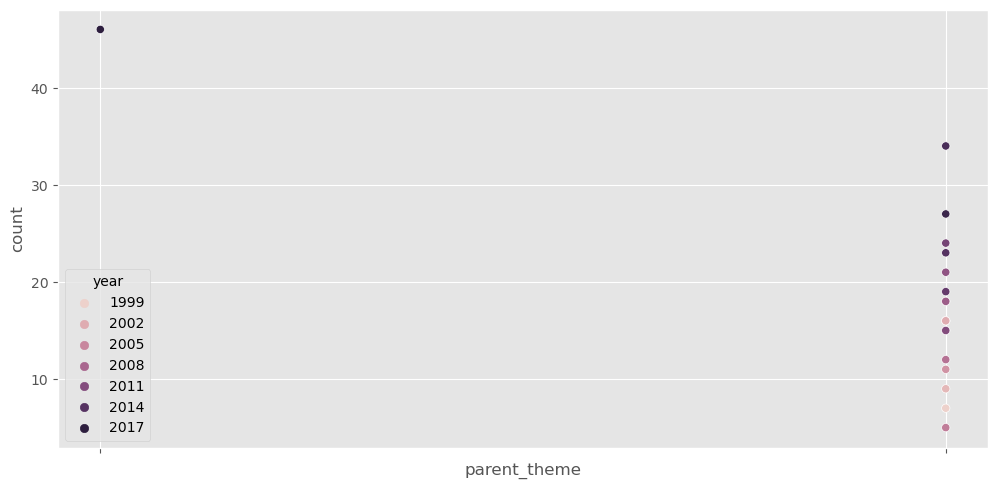

In [28]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(x='parent_theme', y='count', data= lego, hue='year')
plot.set_xticks(plot.get_xticks())

# rotate x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()